# H1N1 AND SEASONAL FLU VACCINE ANALYSIS
## Data:
Dataset: National 2009 H1N1 Flu Survey  
Available here -   https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/    

This dataset contains information collected during the National H1N1 Flu Survey conducted during the H1N1 influenza pandemic in 2009. The survey aimed to monitor vaccination rates and gather information about the various aspects of people's lives, their opinions, and their behavior related to the H1N1 and seasonal flu vaccines.  

This dataset contains -  
Train Features - These are the input variables that the model will use to prerdcit the probability of people taking their H1N1 and seasonal flu vaccines. This file contains 35 features, which cover several areas such as people's education, medical history, demographics etc.  

Training labels -   
This file contains the target variables h1n1_vaccine and seasonal_vaccine. Both are binary variabkes with 1 indicating that the person received the respective vaccine and 0 indicating that he/she did not. Hence, this is a multilabel modeling task.  

Test features-   
These are the features for observations that are used for the predictions after training a model.  


## Goal:
The goal of this project is to examine the data and create a predictive model to analyse the different variables influencing individual vaccination habits during the H1N1 influenza pandemic of 2009. This model can help in predicting vaccination behaviour of the public based on numerous variables and offer insights for upcoming public health initiatives.
  
  
  
We (Aditya Kumar Sasmal and Shruthi Kogileru) have worked on the loading and exploring the data and exploratory data analysis parts of the project together. We then separately performed preproccesing and feature engineering in order to compare and analyse the best approach.

# LOADING AND EXPLORING THE DATA

In [ ]:
pip install lightgbm

In [ ]:
pip install xgboost

In [ ]:
pip install hyperopt

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate,cross_val_predict
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier as RF
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import svm, model_selection,tree, linear_model, neighbors, naive_bayes, ensemble 


In [2]:
# Reading the training features and training labels files
features = pd.read_csv(r'training_set_features.csv')
labels = pd.read_csv(r'training_set_labels.csv')

In [3]:
# Checking the number of rows and columns of these two dataframes
print('Features - ',features.shape)
print('Labels - ',labels.shape)

Features -  (26707, 36)
Labels -  (26707, 3)


In [4]:
# Checking all the columns conatined in the features dataframe and their information
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# Checking all the columns conatined in the features dataframe and their information
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [6]:
# Merging the features and labels into one dataframe
df = pd.merge(features,labels, on='respondent_id')
df.drop('respondent_id',axis = 1,inplace = True)

In [7]:
df.shape

(26707, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

# EXPLORATORY DATA ANALYSIS

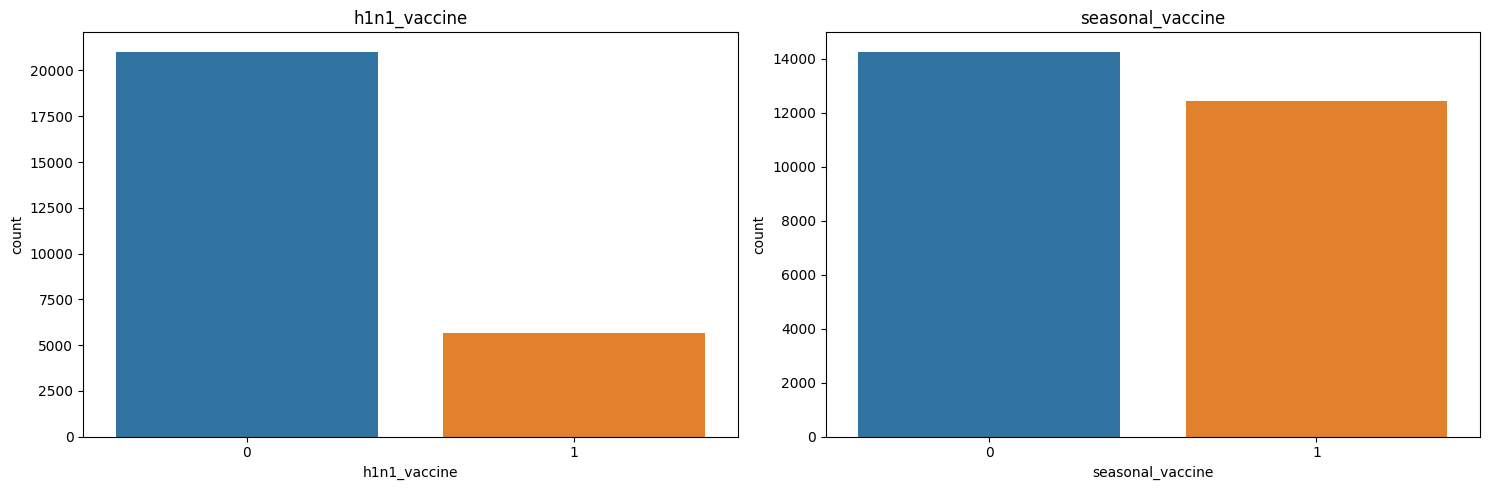

In [9]:
#Plotting the number of people who have received H1N1 and seasonal vaccines respectively
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='h1n1_vaccine', data=labels, ax=axes[0])
axes[0].set_title('h1n1_vaccine')

sns.countplot(x='seasonal_vaccine', data=labels, ax=axes[1])
axes[1].set_title('seasonal_vaccine')

plt.tight_layout()
plt.show()

We can infer from the above graph that the number of people who have received the seasonal vaccine is considerably higher than the ones who have received their H1N1 vaccine.

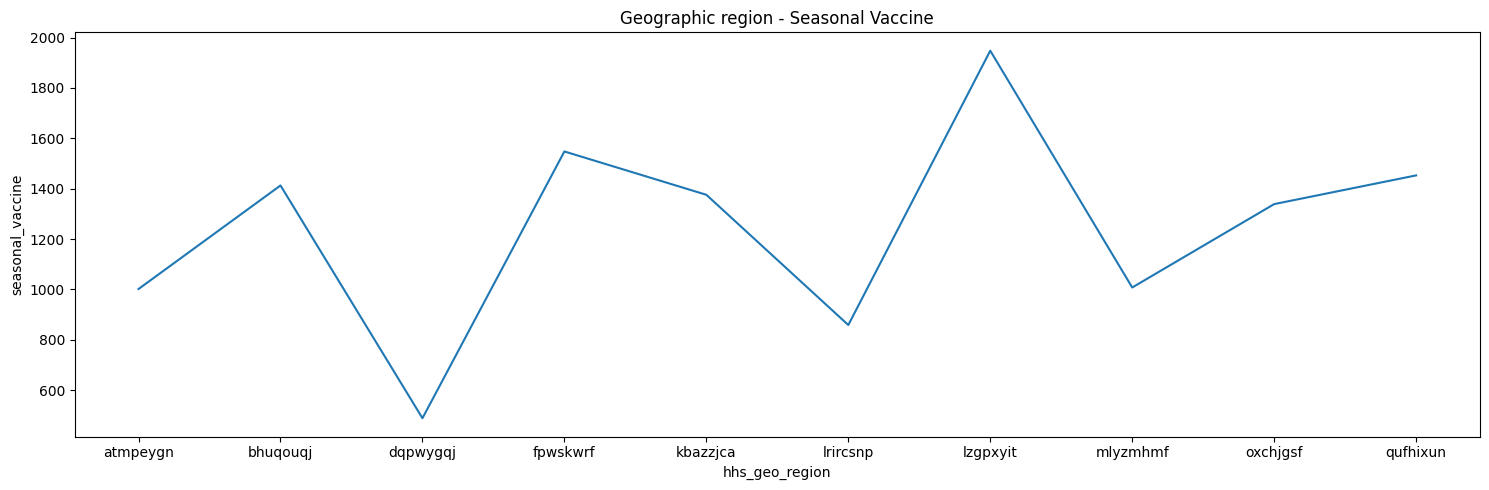

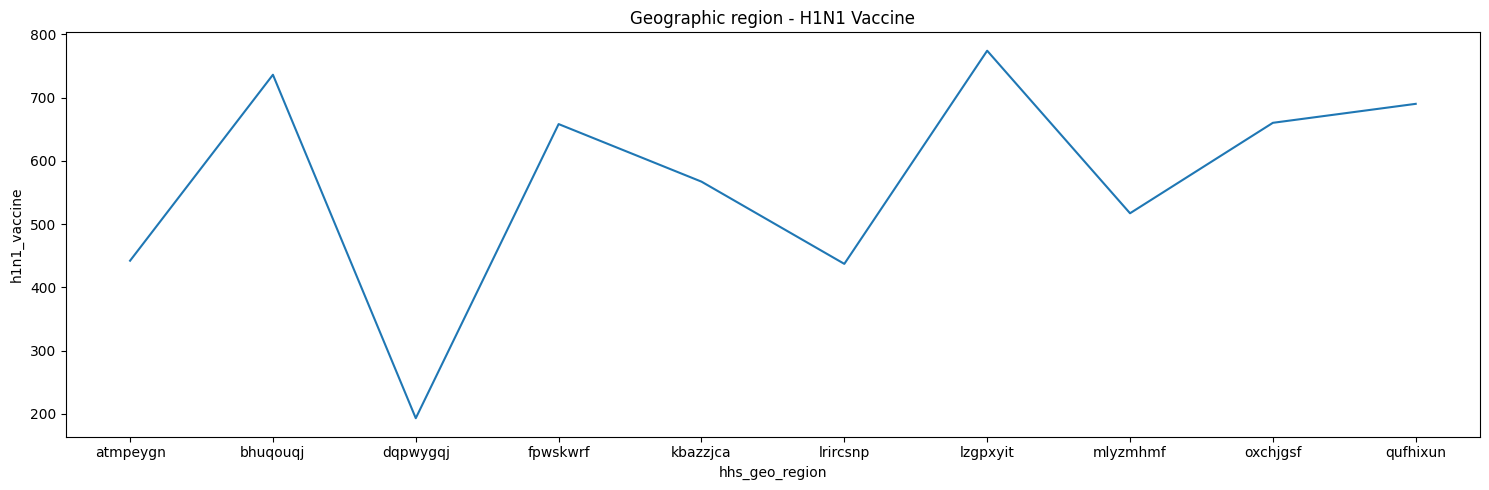

In [10]:
# Plotting the geographic region - Seasonal Vaccine
df_1 = df[df["seasonal_vaccine"] == 1].groupby(df['hhs_geo_region']).sum()
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_1.index, y=df_1['seasonal_vaccine'])
plt.title('Geographic region - Seasonal Vaccine')
plt.tight_layout()
plt.show()

# Plotting the  geographic region - H1N1 Vaccine
df_2 = df[df["h1n1_vaccine"] == 1].groupby(df['hhs_geo_region']).sum()
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_2.index, y=df_2['h1n1_vaccine'])
plt.title('Geographic region - H1N1 Vaccine')
plt.tight_layout()
plt.show()

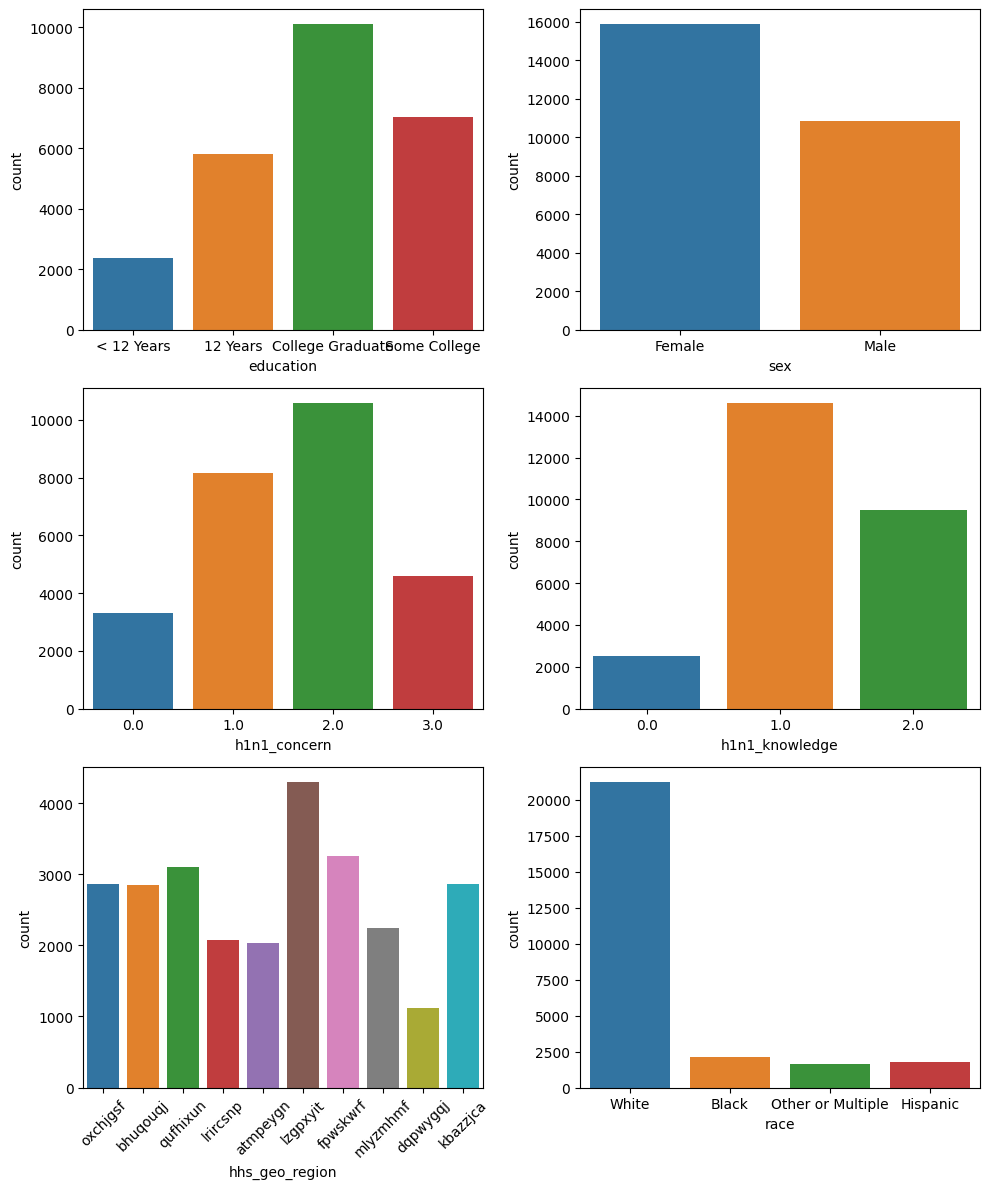

In [11]:
#Plotting a few variables to understand the trend in them

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

sns.countplot(x='education', data=df, ax=axes[0, 0])
sns.countplot(x='sex', data=df, ax=axes[0, 1])
sns.countplot(x='h1n1_concern', data=df, ax=axes[1, 0])
sns.countplot(x='h1n1_knowledge', data=df, ax=axes[1, 1])
sns.countplot(x='hhs_geo_region', data=df, ax=axes[2, 0])
sns.countplot(x='race', data=df, ax=axes[2, 1])

axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()

From the above graphs we can observe the geographical locations where the respective vaccines have been taken more or less.

# DATA PREPROCESSING

We (Aditya Kumar Sasmal and Shruthi Kogileru) have worked separately on the data from here on. We have performed the data preprocessing and the feature engineering parts of the project separately in order to compare our approaches later on. The respective parts of each person have been clearly mentioned in the headings.

## Data preprocessing performed by Aditya Kumar Sasmal -

In [12]:
# Creating another dataframe df_a to be analysed by Aditya only
df_a=df.copy()

In [13]:
# Calculating the precentage of null data
df_a.isnull().sum()/len(df_a) * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [14]:
# Health Insurance, Employment occupation and Employement Industry has a lot of null data, hence dropped
df_a.drop(['health_insurance','employment_occupation','employment_industry'],axis=1,inplace=True)

In [15]:
df_a.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [16]:
# handling the null values 

# The null values in the numeric columns have been filled with the median value of the column
for col in df_a.columns:
    if df_a[col].isnull().sum() and df_a[col].dtypes != 'object':
        df_a[col].loc[(features[col].isnull())] = df_a[col].median()

# The null values in the categorical columns have been filled with the mode of the column
for col in df_a.columns:
    if df_a[col].isnull().sum() and df_a[col].dtypes == 'object':
        df_a[col].loc[(df_a[col].isnull())] = df_a[col].mode().max()


In [17]:
# Cross-verifying that there are no more null values in any column
df_a.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [18]:
# Checking the categorical values
cat_df_a=df_a.select_dtypes(include = 'object').columns
df_a[cat_df_a].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


In [19]:
# Encoding the categorical columns
le=LabelEncoder()
df_a[cat_df_a] = df_a[cat_df_a].apply(lambda x: le.fit_transform(x))

In [20]:
df_a[cat_df_a].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,3,1,3,0,2,1,0,1,8,2
1,1,0,3,1,2,1,1,0,1,0
2,0,2,3,1,0,1,0,0,9,0
3,4,0,3,0,2,1,1,1,5,1
4,2,3,3,0,0,0,0,0,9,0


In [21]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [22]:
data_preprocessed_a=df_a.copy()

## Data preprocessing performed by Shruthi Kogileru -

In [23]:
# Creating another dataframe df_a to be analysed Shruthi only
df_s = df.copy()

In [24]:
# Checking the dataframe for duplicates
df_s.duplicated().sum()

0

In [25]:
# Checking the percentage of null values in each column
df_s.isnull().sum()/ len(df_s)*100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [26]:
# Dropping the columns that have a high percentage of null values - greater than 45%
df_s.drop(['health_insurance','employment_industry','employment_occupation'], axis=1, inplace = True)

In [27]:
# Data imputation

# The null values in the numeric columns have been filled with the rounded mean value of the column 
for column in df_s.columns:
    if df_s[column].isnull().sum() and df_s[column].dtype != 'object':
        df_s[column].fillna(np.round(df_s[column].mean()), inplace=True)

# The null values in the categorical columns have been filled with 'None'
for column in df_s.columns:
    if df_s[column].isnull().sum() and df_s[column].dtype == 'object':
        df_s[column].fillna('None', inplace=True)

In [28]:
# Cross-verifying that there are no more null values in any column
df_s.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [29]:
df_s.shape

(26707, 34)

In [30]:
# Label encoder is used to encode the categorical columns
label_encoder = LabelEncoder()

for column in df_s.columns:
    if df_s[column].dtype == 'object':
        df_s[column] = label_encoder.fit_transform(df_s[column])

In [31]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

# FEATURE ENGINEERING

## Feature Engineering performed by Aditya Kumar Sasmal - 

In [32]:
# From the observation made during EDA, another attribute is created called hygiene 
# All the columns related to people's personal hygiene are combined to form one feature and analyse together
# This is inspired from - https://www.kaggle.com/code/darkknight98/flu-shot-prediction-complete-eda-and-hpo

df_a['hygiene'] =  df_a['behavioral_antiviral_meds']+df_a['behavioral_avoidance']+\
df_a['behavioral_face_mask']+df_a['behavioral_outside_home'] +df_a['behavioral_wash_hands']+df_a['behavioral_touch_face']
print(df_a['hygiene'])                                            

0        2.0
1        4.0
2        1.0
3        2.0
4        3.0
        ... 
26702    2.0
26703    2.0
26704    4.0
26705    1.0
26706    1.0
Name: hygiene, Length: 26707, dtype: float64


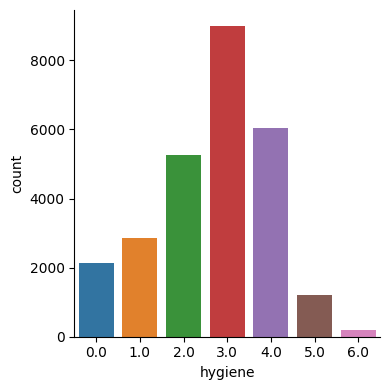

In [33]:
# Plotting this new feature hygiene
print(sns.catplot(x='hygiene',data=df_a,kind='count',height=4))
plt.show()

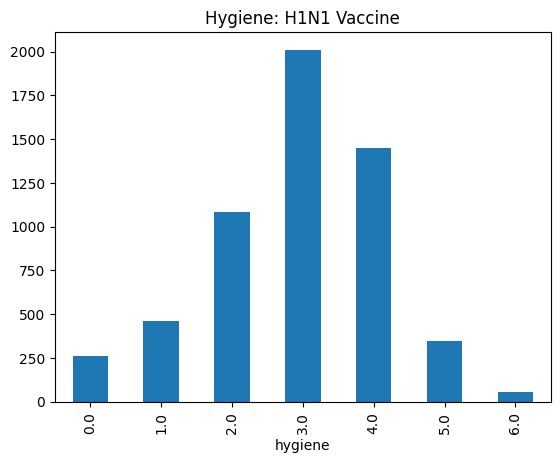

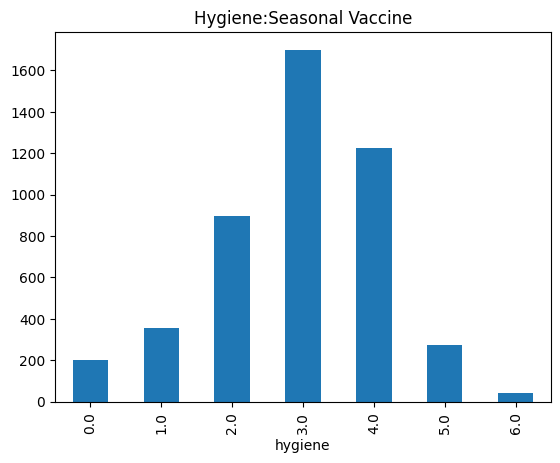

In [34]:
# Plotting the hygiene column against h1n1_vaccine (target variable)
df_h1n1 = df_a[df_a["h1n1_vaccine"] == 1].groupby(df_a['hygiene']).sum()
df_h1n1['h1n1_vaccine'].plot(kind='bar', title='Hygiene: H1N1 Vaccine')
plt.show()

# Plotting the hygiene column against seasonal_vaccine (target variable)
df_seasonal = df_a[df_a["h1n1_vaccine"] == 1].groupby(df_a['hygiene']).sum()
df_seasonal['seasonal_vaccine'].plot(kind='bar', title='Hygiene:Seasonal Vaccine')
plt.show()

In [35]:
# making another feature called opinion combining all the features related to people's opinions on the vaccines

df_a['opinion'] = df_a['opinion_h1n1_vacc_effective']+df_a['opinion_seas_vacc_effective']+\
df_a['opinion_seas_risk'] + df_a['opinion_h1n1_risk']+\
df_a['opinion_h1n1_sick_from_vacc'] + df_a['opinion_seas_sick_from_vacc']
print(df_a['opinion'])  

0        11.0
1        23.0
2        12.0
3        21.0
4        16.0
         ... 
26702    14.0
26703    15.0
26704    21.0
26705    11.0
26706    14.0
Name: opinion, Length: 26707, dtype: float64


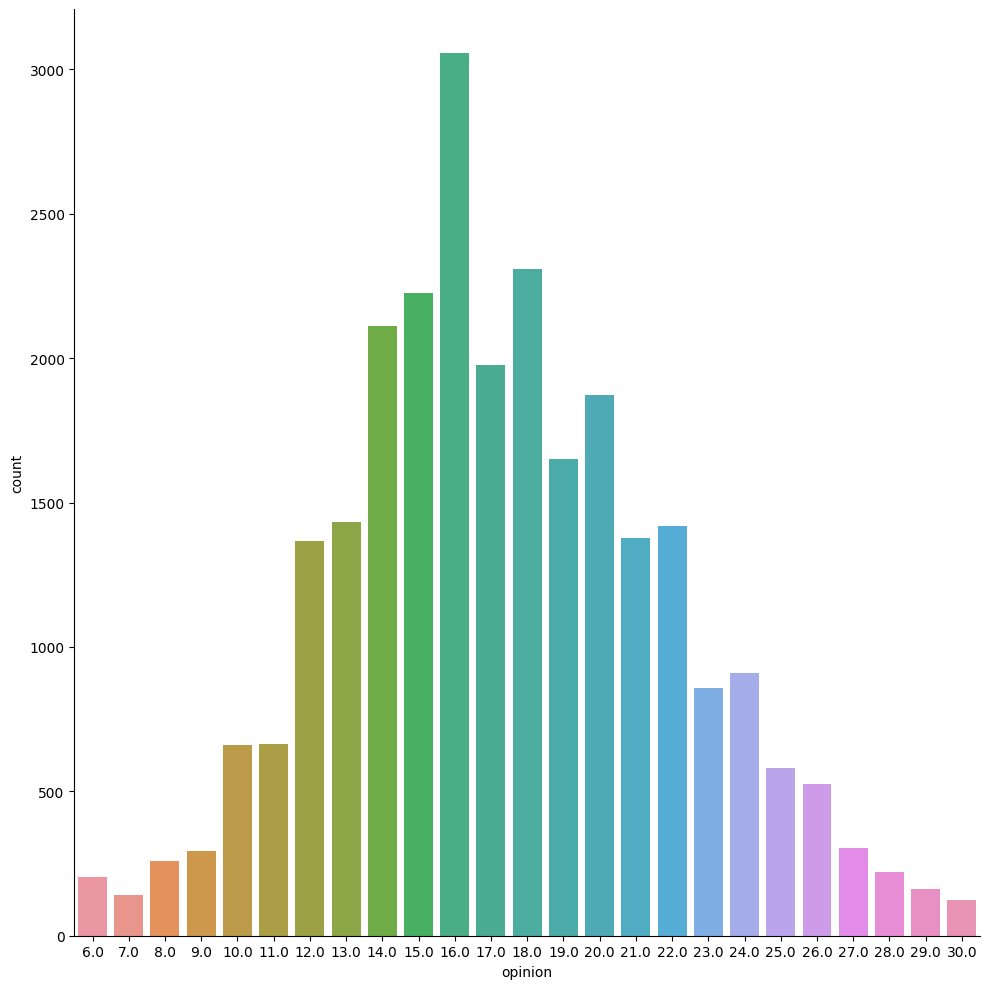

In [36]:
# Plotting this new variable opinion
print(sns.catplot(x='opinion',data=df_a,kind='count', height=10))
plt.show()

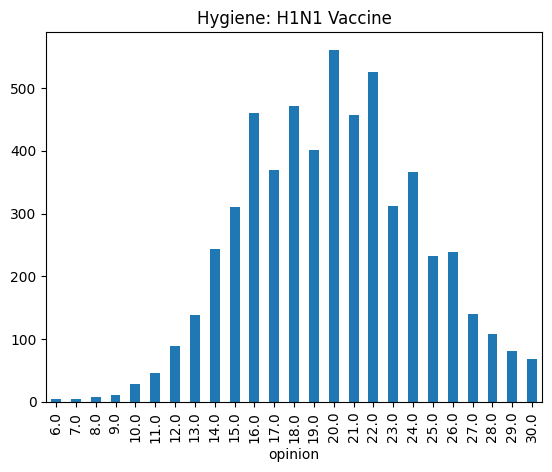

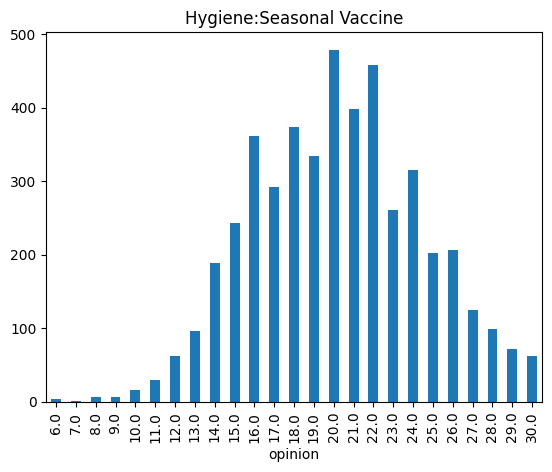

In [37]:
# Plotting opinion against the h1n1_vaccine (target variable)
df_h1n1 = df_a[df_a["h1n1_vaccine"] == 1].groupby(df_a['opinion']).sum()
df_h1n1['h1n1_vaccine'].plot(kind='bar', title='Hygiene: H1N1 Vaccine')
plt.show()

# Plotting opinion against the seasonal_vaccine (target variable)
df_seasonal = df_a[df_a["h1n1_vaccine"] == 1].groupby(df_a['opinion']).sum()
df_seasonal['seasonal_vaccine'].plot(kind='bar', title='Hygiene:Seasonal Vaccine')
plt.show()

In [38]:
# creating seperate features for opinions related to h1n1 vaccine and seasonal vaccine respectively

df_a['h1n1_opinion'] = df_a['opinion_h1n1_vacc_effective'] + df_a['opinion_h1n1_risk']-\
df_a['opinion_h1n1_sick_from_vacc'] 
df_a['seasonal_opinion'] = df_a['opinion_seas_risk'] + df_a['opinion_seas_vacc_effective']-\
df_a['opinion_seas_sick_from_vacc']

In [39]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

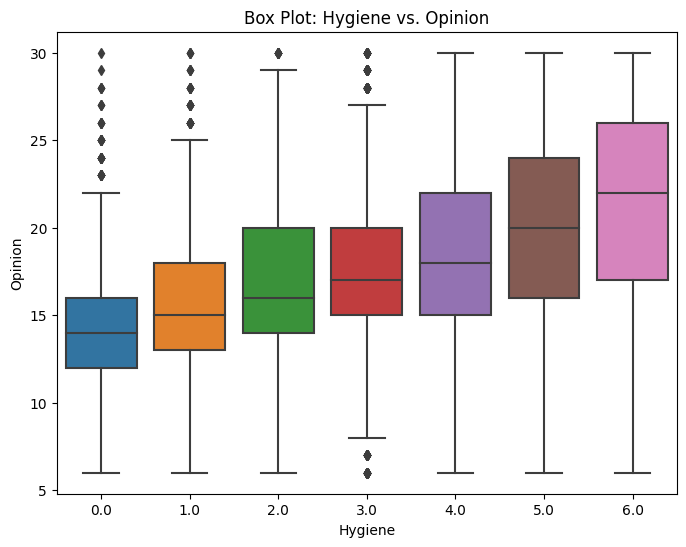

In [40]:
# Builting box plot to find out outliers in hygiene vs Opinion fetures.

plt.figure(figsize=(8, 6))
sns.boxplot(x="hygiene", y="opinion", data=df_a)

plt.xlabel("Hygiene")
plt.ylabel("Opinion")
plt.title("Box Plot: Hygiene vs. Opinion")


plt.show()

In [41]:
#correlation check
print("h1n1 vaccine coorelation")
print(df_a.corrwith(df_a.h1n1_vaccine))
print("seasonal vaccine coorelation")
print(df_a.corrwith(df_a.seasonal_vaccine))

h1n1 vaccine coorelation
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
doctor_recc_h1n1               0.394086
doctor_recc_seasonal           0.218976
chronic_med_condition          0.094360
child_under_6_months           0.066712
health_worker                  0.168056
opinion_h1n1_vacc_effective    0.267352
opinion_h1n1_risk              0.320580
opinion_h1n1_sick_from_vacc    0.074580
opinion_seas_vacc_effective    0.177799
opinion_seas_risk              0.255874
opinion_seas_sick_from_vacc    0.008415
age_group                      0.041074
education                      0.033745
race                           0.041061
sex                           -0.020672
income_poverty 

In [42]:
# Checking for high value rows of concern and knowledge

df_a['concerned']=np.where(df_a['h1n1_concern']>= 2,1,0) 
df_a['danger'] = np.where(df_a['opinion_h1n1_risk']>=3,1,0)
df_a['well_aware_h1n1']=np.where(df_a['h1n1_knowledge']>= 2,1,0)

In [43]:
df_a.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'hygiene', 'opinion', 'h1n1_opinion',
       'seasonal_opinion', 'concerned', 'danger', 'well_aware_h1n1'],
      dtype='object')

In [44]:
# dropping irrelavant attributes and setting up the target variable

df_a.drop(['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_seas_vacc_effective','opinion_seas_risk','child_under_6_months' , 'race' ,'opinion_seas_sick_from_vacc' , 'opinion_h1n1_sick_from_vacc' , 'household_adults' , 'opinion_h1n1_sick_from_vacc' , 'behavioral_antiviral_meds' , 'behavioral_large_gatherings' , 'behavioral_outside_home' , 'behavioral_antiviral_meds',
           'behavioral_avoidance' , 'behavioral_wash_hands' , 'behavioral_touch_face' , 'behavioral_face_mask' , 'marital_status' ,'income_poverty' , 'hhs_geo_region' , 'employment_status' ,'education' , 'census_msa'],axis=1,inplace = True)

Y_label = df_a[['h1n1_vaccine','seasonal_vaccine']]

df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   h1n1_concern           26707 non-null  float64
 1   h1n1_knowledge         26707 non-null  float64
 2   doctor_recc_h1n1       26707 non-null  float64
 3   doctor_recc_seasonal   26707 non-null  float64
 4   chronic_med_condition  26707 non-null  float64
 5   health_worker          26707 non-null  float64
 6   age_group              26707 non-null  int32  
 7   sex                    26707 non-null  int32  
 8   rent_or_own            26707 non-null  int32  
 9   household_children     26707 non-null  float64
 10  h1n1_vaccine           26707 non-null  int64  
 11  seasonal_vaccine       26707 non-null  int64  
 12  hygiene                26707 non-null  float64
 13  opinion                26707 non-null  float64
 14  h1n1_opinion           26707 non-null  float64
 15  se

In [45]:
df_a.shape

(26707, 19)

In [46]:
df_a.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1,inplace = True)
frames =[df_a,Y_label]
df_a = pd.concat(frames,axis=1)

# Feature Engineering performed by Shruthi Kogileru -

In [47]:
df_s.shape

(26707, 34)

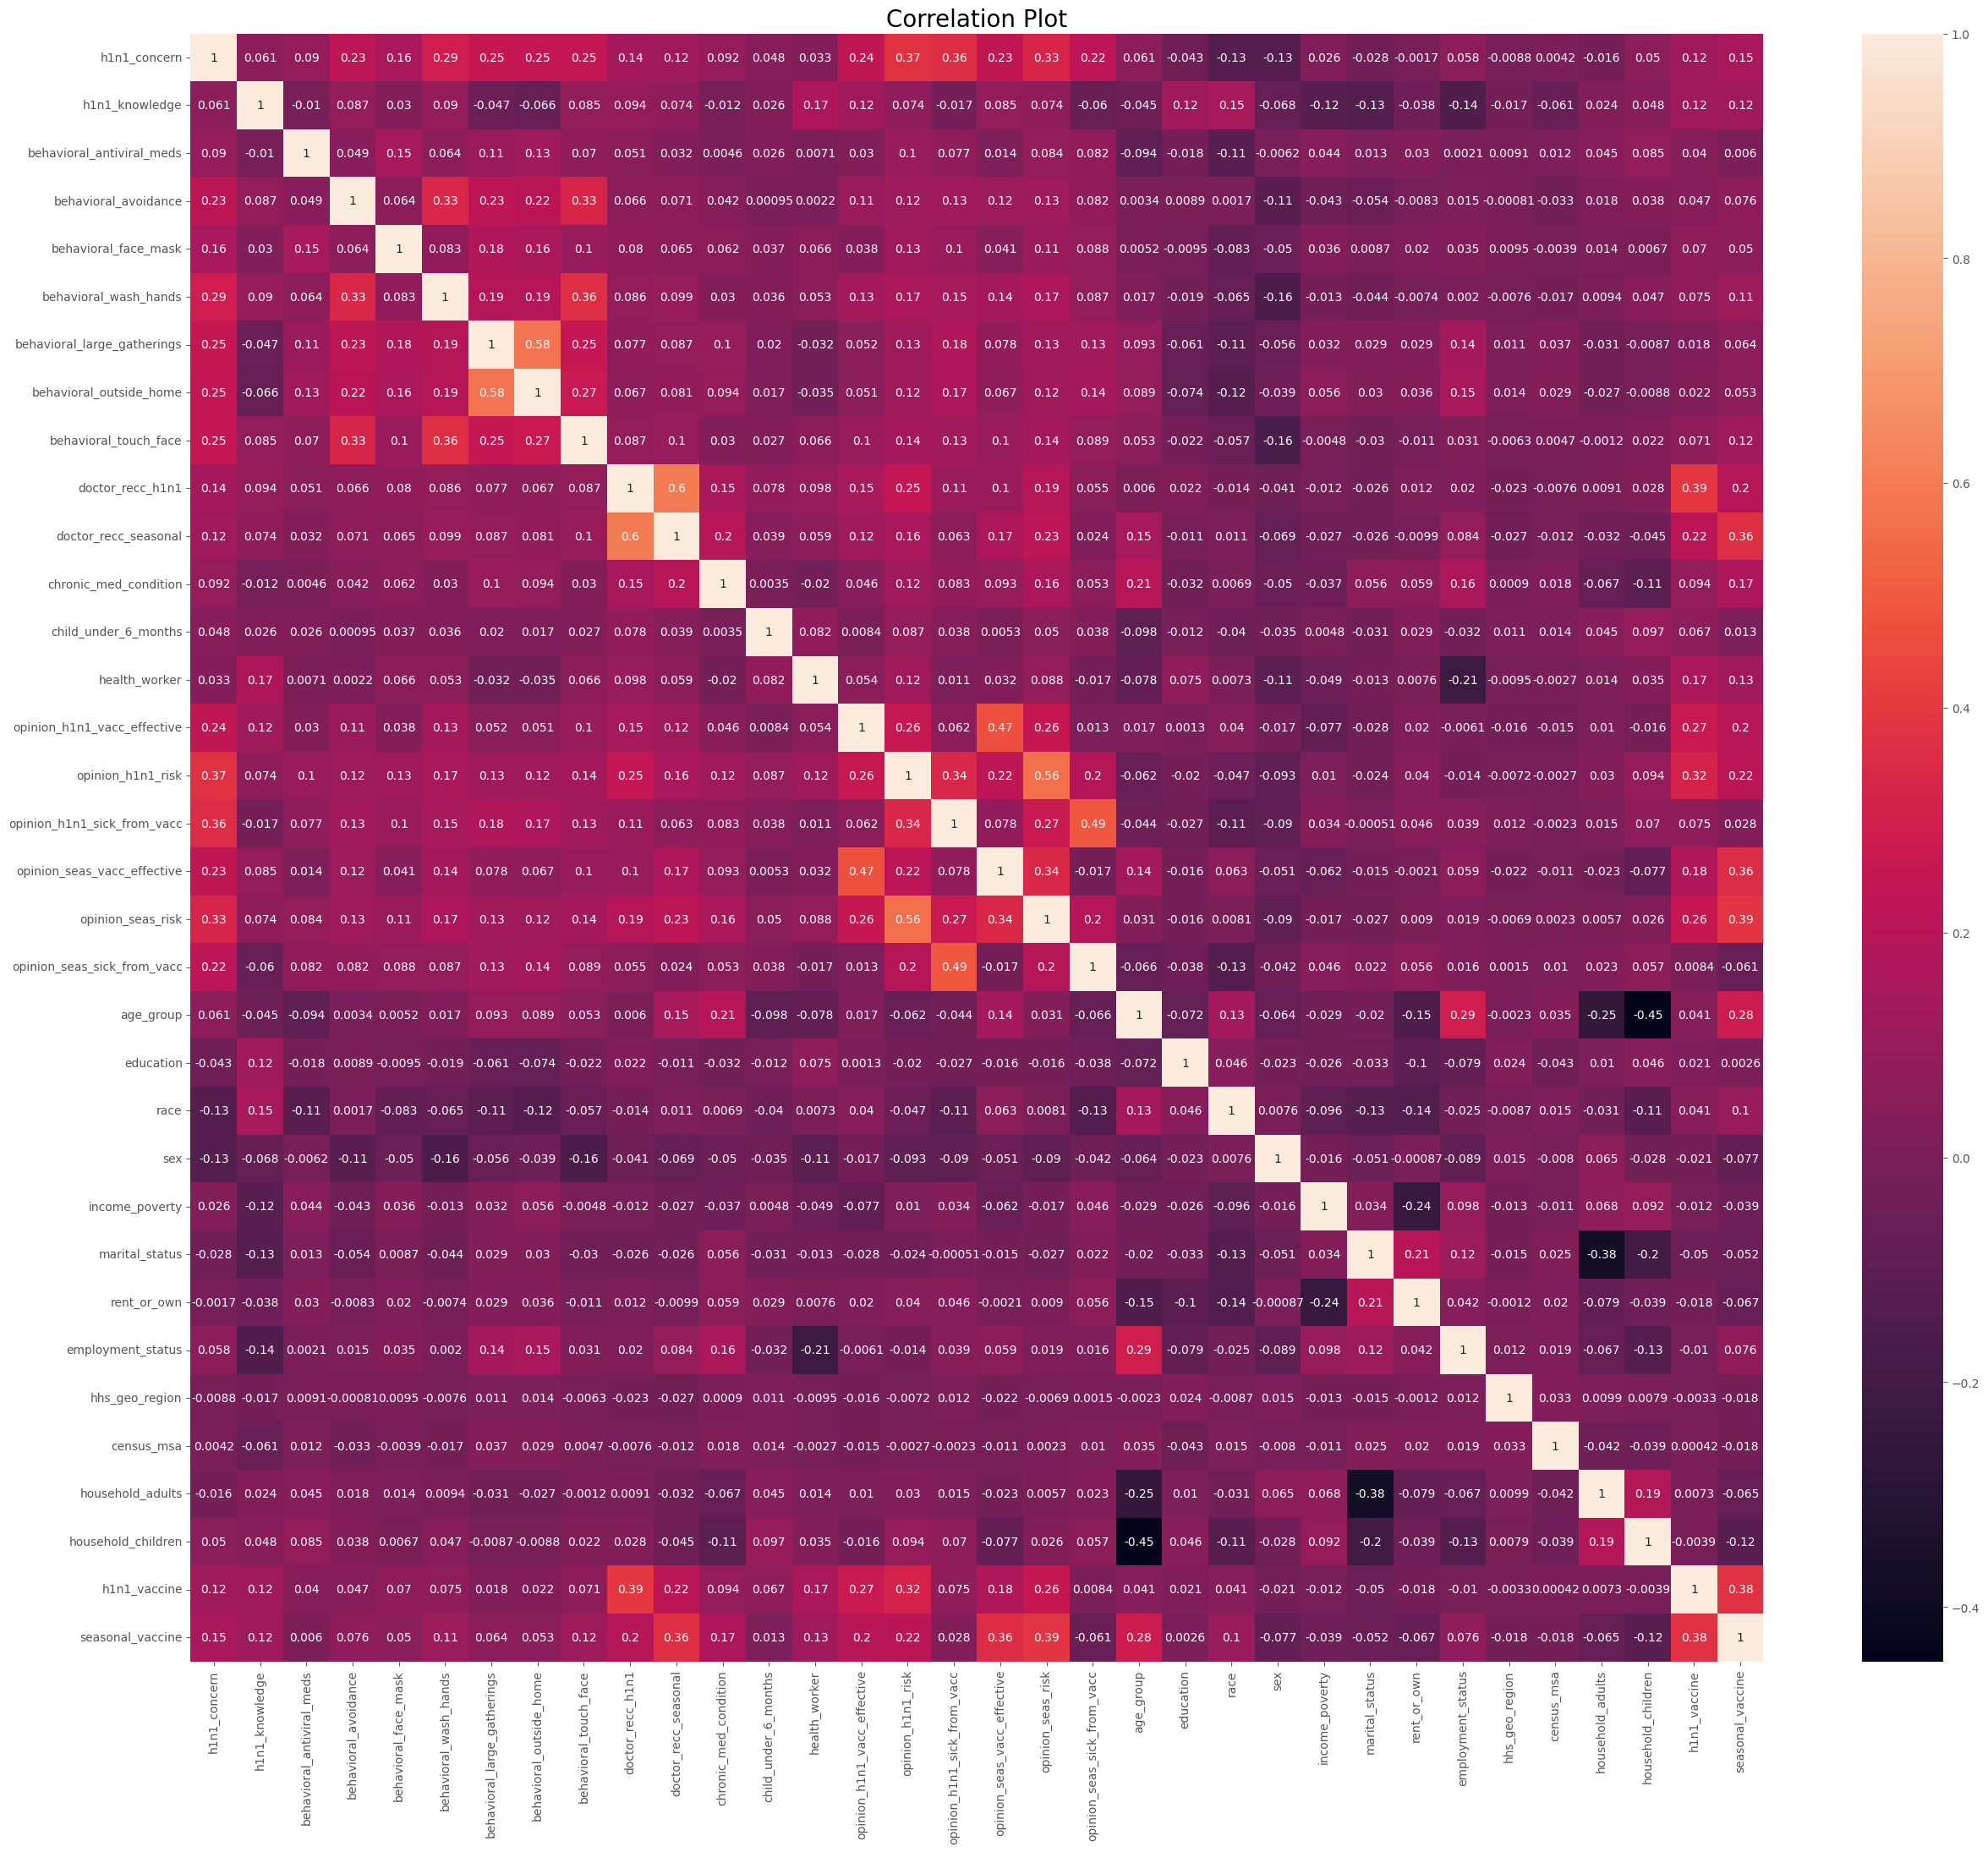

In [48]:
#Plotting the correlation matrix
plt.rcParams['figure.figsize'] = (30, 25)
plt.style.use('ggplot')

sns.heatmap(df_s.corr(), annot=True)
plt.title('Correlation Plot', fontsize = 20)
plt.show()

In [49]:
#Checking the correlation of all columns with h1n1_vaccine (target variable)
df_s.corrwith(df_s.h1n1_vaccine)

h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
doctor_recc_h1n1               0.394086
doctor_recc_seasonal           0.218976
chronic_med_condition          0.094360
child_under_6_months           0.066712
health_worker                  0.168056
opinion_h1n1_vacc_effective    0.267352
opinion_h1n1_risk              0.320580
opinion_h1n1_sick_from_vacc    0.074580
opinion_seas_vacc_effective    0.177799
opinion_seas_risk              0.255955
opinion_seas_sick_from_vacc    0.008415
age_group                      0.041074
education                      0.020766
race                           0.041061
sex                           -0.020672
income_poverty                -0.012236


In [50]:
#Checking the correlation of all columns with seasonal_vaccine (target variable)
df_s.corrwith(df_s.seasonal_vaccine)

h1n1_concern                   0.154488
h1n1_knowledge                 0.119779
behavioral_antiviral_meds      0.006013
behavioral_avoidance           0.076130
behavioral_face_mask           0.050020
behavioral_wash_hands          0.112254
behavioral_large_gatherings    0.063722
behavioral_outside_home        0.053287
behavioral_touch_face          0.119925
doctor_recc_h1n1               0.198560
doctor_recc_seasonal           0.360696
chronic_med_condition          0.169465
child_under_6_months           0.013424
health_worker                  0.126977
opinion_h1n1_vacc_effective    0.203187
opinion_h1n1_risk              0.215650
opinion_h1n1_sick_from_vacc    0.027964
opinion_seas_vacc_effective    0.358869
opinion_seas_risk              0.385668
opinion_seas_sick_from_vacc   -0.060538
age_group                      0.277454
education                      0.002553
race                           0.101743
sex                           -0.077091
income_poverty                -0.038593


In [51]:
#Analysing from the correlation map and the correlation values, we drop the following columns -
df_s.drop(['opinion_seas_sick_from_vacc', 'hhs_geo_region', 'census_msa', 'household_adults','household_children','behavioral_antiviral_meds', 'education'], axis = 1, inplace = True)

In [52]:
df_s

,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_risk,age_group,race,sex,income_poverty,marital_status,rent_or_own,employment_status,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,3,3,0,2,2,1,2,0,0
1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1,3,1,2,2,2,0,0,1
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0,3,1,0,2,1,0,0,0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,4.0,4,3,0,2,2,2,2,0,1
4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,2,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4,3,0,0,2,1,2,0,0
26703,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0,3,1,0,2,2,0,0,0
26704,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,4.0,3,3,0,3,2,1,1,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,1,0,0,0,2,0,0,0


In [53]:
# Calculating the z-score for each numeric column to check for outliers in all columns and remove the rows with outlier values

z_scores = (df_s.select_dtypes(include=np.number)-df_s.select_dtypes(include=np.number).mean())/df_s.select_dtypes(include=np.number).std()
threshold = 3
rows_out = (z_scores.abs()> threshold).any(axis=1)
df_s= df_s[~rows_out]

df_s.shape

(22943, 27)

# Applying Machine Learning Models

## Checking the accuracy of Aditya's approach -

In [54]:
# Separating the features and labels

features_a = df_a.columns[:-2]
labels_a = df_a[['h1n1_vaccine','seasonal_vaccine']]

Executing GradientBoostingClassifier
Executing AdaBoostClassifier
Executing LogisticRegressionCV
Executing BernoulliNB
Executing GradientBoostingClassifier
Executing AdaBoostClassifier
Executing LogisticRegressionCV
Executing BernoulliNB


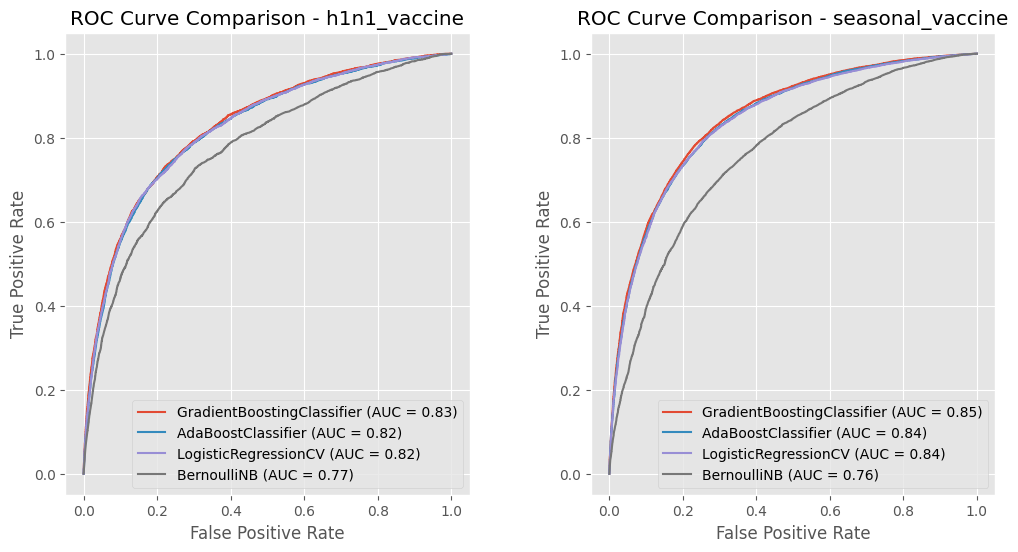

Model Comparison:
                   Model_Name  Test Accuracy (h1n1) Test Accuracy (seasonal)   
0  GradientBoostingClassifier              0.835399                  0.77328  \
1          AdaBoostClassifier              0.828959                 0.769087   
2        LogisticRegressionCV              0.831243                 0.768787   
3                 BernoulliNB              0.806268                 0.705096   

  Mean Accuracy       AUC  
0       0.80434  0.849184  
1      0.799023  0.843554  
2      0.800015  0.842149  
3      0.755682  0.764688  


In [55]:
# Defining the models
models = [
    ('GradientBoostingClassifier', ensemble.GradientBoostingClassifier()),
    ('AdaBoostClassifier', ensemble.AdaBoostClassifier()),
    ('LogisticRegressionCV', linear_model.LogisticRegressionCV()),
    ('BernoulliNB', naive_bayes.BernoulliNB()),
]

# Creating model metrics comparison tabe
Model_columns = ['Model_Name', 'Test Accuracy (h1n1)', 'Test Accuracy (seasonal)', 'Mean Accuracy', 'AUC']
Model_compare = pd.DataFrame(columns=Model_columns)

# Plotting h1n1_vaccine ROC curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for h1n1_vaccine

# Iterating through the models
for model_name, model in models:
    print('Executing', model_name)

    # training data for h1n1_vaccine fitting
    model.fit(df_a[features_a], df_a['h1n1_vaccine'])

    # Computing accuracy for h1n1_vaccine
    accuracy_h1n1 = cross_val_score(model, df_a[features_a], df_a['h1n1_vaccine'], cv=10).mean()

    # Obtaining probabilities for h1n1_vaccine predictions
    y_scores_h1n1 = cross_val_predict(model, df_a[features_a], df_a['h1n1_vaccine'], cv=10, method='predict_proba')
    fpr_h1n1, tpr_h1n1, _ = roc_curve(df_a['h1n1_vaccine'], y_scores_h1n1[:, 1])
    roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

    # Plotting h1n1_vaccine ROC curve
    plt.plot(fpr_h1n1, tpr_h1n1, label=f'{model_name} (AUC = {roc_auc_h1n1:.2f})')

    # Storing accuracy and AUC values 
    Model_compare.loc[len(Model_compare)] = [model_name, accuracy_h1n1, None, None, roc_auc_h1n1]

# Setting up labels and title for the h1n1_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - h1n1_vaccine')
plt.legend(loc='lower right')

# Plotting seasonal_vaccine ROC curves
plt.subplot(1, 2, 2)  # Create a subplot for seasonal_vaccine

# Iterating through models
for model_name, model in models:
    print('Executing', model_name)

    # training data for seasonal_vaccine Fit
    model.fit(df_a[features_a], df_a['seasonal_vaccine'])

    # Computing accuracy for seasonal_vaccine
    accuracy_seasonal = cross_val_score(model, df_a[features_a], df_a['seasonal_vaccine'], cv=10).mean()

    # Obtaining probabilities for seasonal_vaccine predictions
    y_scores_seasonal = cross_val_predict(model, df_a[features_a], df_a['seasonal_vaccine'], cv=10, method='predict_proba')
    fpr_seasonal, tpr_seasonal, _ = roc_curve(df_a['seasonal_vaccine'], y_scores_seasonal[:, 1])
    roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

    # Plotting seasonal_vaccine ROC curve
    plt.plot(fpr_seasonal, tpr_seasonal, label=f'{model_name} (AUC = {roc_auc_seasonal:.2f})')

    # Updating Model_compare dataframe with accuracy and AUC values
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'Test Accuracy (seasonal)'] = accuracy_seasonal
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'AUC'] = roc_auc_seasonal

# Setting up seasonal_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - seasonal_vaccine')
plt.legend(loc='lower right')

# Adjustting the spacing 
plt.subplots_adjust(wspace=0.3)


plt.show()

# Calculating mean accuracy across models
Model_compare['Mean Accuracy'] = Model_compare[['Test Accuracy (h1n1)', 'Test Accuracy (seasonal)']].mean(axis=1)

# Displaying model comparison table
print("Model Comparison:")
print(Model_compare)


## Checking the accuracy of Shruthi's approach -

In [56]:
# Separating the features and labels
features_s = df_s.columns[:-2]
labels_s = ['h1n1_vaccine', 'seasonal_vaccine']

Executing GradientBoostingClassifier
Executing RandomForestClassifier
Executing KNeighborsClassifier
Executing XGBClassifier
Executing GradientBoostingClassifier
Executing RandomForestClassifier
Executing KNeighborsClassifier
Executing XGBClassifier


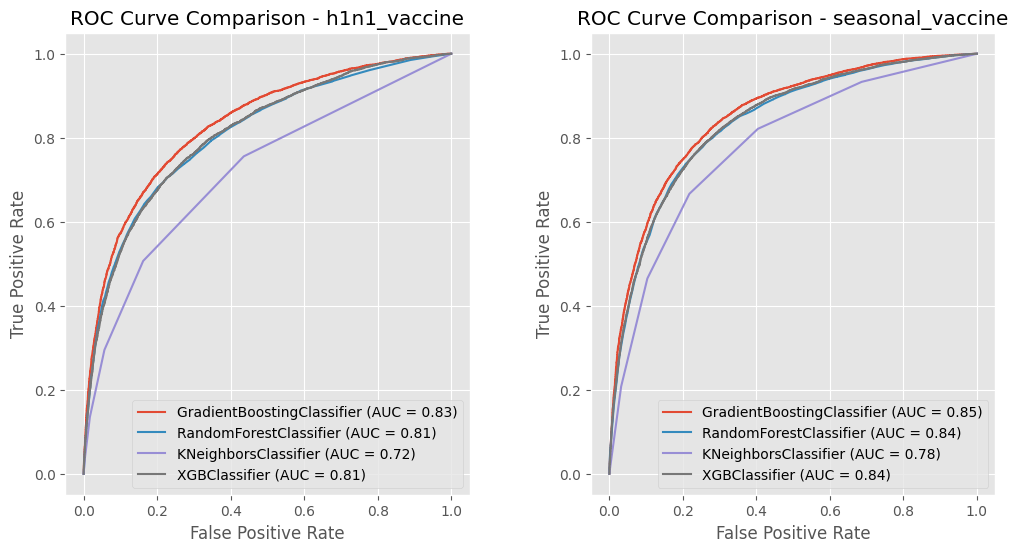

Model Comparison:
                   Model_Name  Test Accuracy (h1n1) Test Accuracy (seasonal)   
0  GradientBoostingClassifier              0.846969                  0.77745  \
1      RandomForestClassifier              0.841782                 0.766683   
2        KNeighborsClassifier              0.815543                 0.729243   
3               XGBClassifier              0.836464                 0.765115   

  Mean Accuracy       AUC  
0      0.812209  0.851488  
1      0.804233  0.835568  
2      0.772393  0.781211  
3      0.800789  0.837396  


In [57]:
# Defining the models
models = [
    ('GradientBoostingClassifier', ensemble.GradientBoostingClassifier()),
    ('RandomForestClassifier', ensemble.RandomForestClassifier()),
    ('KNeighborsClassifier', neighbors.KNeighborsClassifier()),
    ('XGBClassifier', XGBClassifier())
]

# Creating model metrics comparison table
Model_columns = ['Model_Name', 'Test Accuracy (h1n1)', 'Test Accuracy (seasonal)', 'Mean Accuracy', 'AUC']
Model_compare = pd.DataFrame(columns=Model_columns)

# Plotting ROC curves for h1n1_vaccine
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for h1n1_vaccine

# Iteratting through models
for model_name, model in models:
    print('Executing', model_name)

    # Fitting model with training data for h1n1_vaccine
    model.fit(df_s[features_s], df_s['h1n1_vaccine'])

    # Computing accuracy for h1n1_vaccine
    accuracy_h1n1 = cross_val_score(model, df_s[features_s], df_s['h1n1_vaccine'], cv=10).mean()

    # Obtaining probabilities for h1n1_vaccine prediction
    y_scores_h1n1 = cross_val_predict(model, df_s[features_s], df_s['h1n1_vaccine'], cv=10, method='predict_proba')
    fpr_h1n1, tpr_h1n1, _ = roc_curve(df_s['h1n1_vaccine'], y_scores_h1n1[:, 1])
    roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

    # Plotting h1n1_vaccine ROC curves
    plt.plot(fpr_h1n1, tpr_h1n1, label=f'{model_name} (AUC = {roc_auc_h1n1:.2f})')

    # Storing accuracy and AUC values in Model_compare dataframe
    Model_compare.loc[len(Model_compare)] = [model_name, accuracy_h1n1, None, None, roc_auc_h1n1]

# Setting up h1n1_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - h1n1_vaccine')
plt.legend(loc='lower right')

# Plotting seasonal_vaccine ROC curve
plt.subplot(1, 2, 2)  # Create a subplot for seasonal_vaccine

# Iterating through  models
for model_name, model in models:
    print('Executing', model_name)

    # Fitting the model with training data for seasonal_vaccine
    model.fit(df_s[features_s], df_s['seasonal_vaccine'])

    # Computing accuracy for seasonal_vaccine
    accuracy_seasonal = cross_val_score(model, df_s[features_s], df_s['seasonal_vaccine'], cv=10).mean()

    # Obtaining probabilities for seasonal_vaccine predictions
    y_scores_seasonal = cross_val_predict(model, df_s[features_s], df_s['seasonal_vaccine'], cv=10, method='predict_proba')
    fpr_seasonal, tpr_seasonal, _ = roc_curve(df_s['seasonal_vaccine'], y_scores_seasonal[:, 1])
    roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

    # Plotting seasonal_vaccine ROC curve
    plt.plot(fpr_seasonal, tpr_seasonal, label=f'{model_name} (AUC = {roc_auc_seasonal:.2f})')

    # Updating Model_compare dataframe with accuracy and AUC values
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'Test Accuracy (seasonal)'] = accuracy_seasonal
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'AUC'] = roc_auc_seasonal

# Setting up seasonal_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - seasonal_vaccine')
plt.legend(loc='lower right')

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.3)


plt.show()

# Calculating mean accuracy across models
Model_compare['Mean Accuracy'] = Model_compare[['Test Accuracy (h1n1)', 'Test Accuracy (seasonal)']].mean(axis=1)

# Displaying the model comparison table
print("Model Comparison:")
print(Model_compare)


# CHECKING COMBINATIONS

We have used Aditya's preprocessed data with Shruthi's feature engineering to explore options.

In [58]:
# To be applied to the data pre-processed by Aditya
def AS (x):
    data=x.copy()
    data.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

    z_scores = (data.select_dtypes(include=np.number)-data.select_dtypes(include=np.number).mean())/data.select_dtypes(include=np.number).std()
    threshold = 3
    rows_out = (z_scores.abs()> threshold).any(axis=1)
    data_new= data[~rows_out]
   
    return x

In [59]:
x=AS(data_preprocessed_a)

In [60]:
# Separating the features and labels
features_x = x.columns[:-2]
labels_x = ['h1n1_vaccine', 'seasonal_vaccine']

Executing GradientBoostingClassifier
Executing AdaBoostClassifier
Executing RandomForestClassifier
Executing LogisticRegressionCV
Executing BernoulliNB
Executing KNeighborsClassifier
Executing DecisionTreeClassifier
Executing XGBClassifier
Executing GradientBoostingClassifier
Executing AdaBoostClassifier
Executing RandomForestClassifier
Executing LogisticRegressionCV
Executing BernoulliNB
Executing KNeighborsClassifier
Executing DecisionTreeClassifier
Executing XGBClassifier


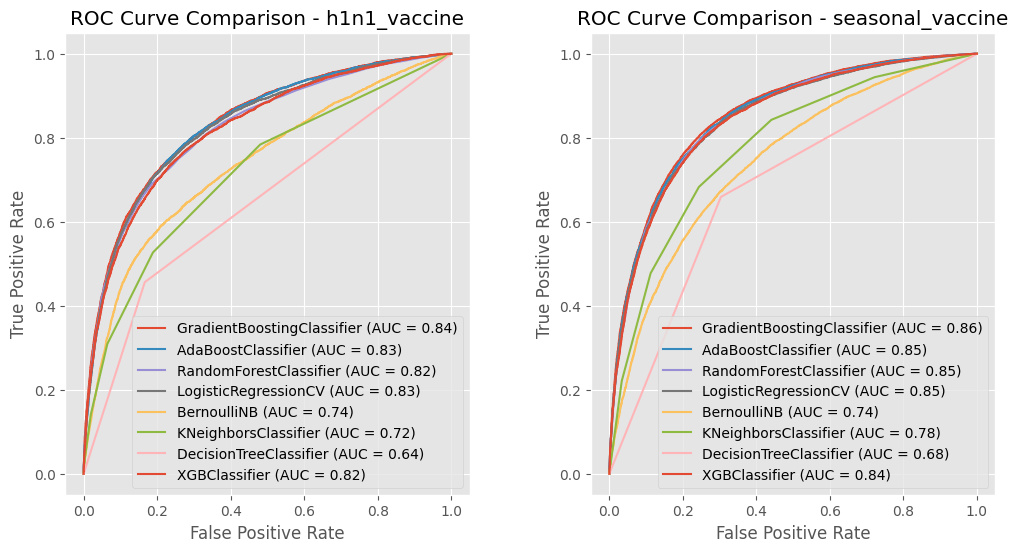

Model Comparison:
                   Model_Name  Test Accuracy (h1n1) Test Accuracy (seasonal)   
0  GradientBoostingClassifier              0.838207                 0.780282  \
1          AdaBoostClassifier              0.834800                 0.776838   
2      RandomForestClassifier              0.834875                 0.772606   
3        LogisticRegressionCV              0.835025                  0.77197   
4                 BernoulliNB              0.801325                 0.688396   
5        KNeighborsClassifier              0.802486                 0.722058   
6      DecisionTreeClassifier              0.751189                 0.679522   
7               XGBClassifier              0.832853                 0.772232   

  Mean Accuracy       AUC  
0      0.809245  0.855184  
1      0.805819  0.850750  
2      0.803741  0.846862  
3      0.803497  0.845575  
4      0.744861  0.744557  
5      0.762272  0.779100  
6      0.715356  0.677748  
7      0.802542  0.844774  


In [61]:
# Defining the models
models = [
    ('GradientBoostingClassifier', ensemble.GradientBoostingClassifier()),
    ('AdaBoostClassifier', ensemble.AdaBoostClassifier()),
    ('RandomForestClassifier', ensemble.RandomForestClassifier()),
    ('LogisticRegressionCV', linear_model.LogisticRegressionCV()),
    ('BernoulliNB', naive_bayes.BernoulliNB()),
    ('KNeighborsClassifier', neighbors.KNeighborsClassifier()),
    ('DecisionTreeClassifier', tree.DecisionTreeClassifier()),
    ('XGBClassifier', XGBClassifier())
]

# Creating table to compare model metrics
Model_columns = ['Model_Name', 'Test Accuracy (h1n1)', 'Test Accuracy (seasonal)', 'Mean Accuracy', 'AUC']
Model_compare = pd.DataFrame(columns=Model_columns)

# Plotting ROC curves for h1n1_vaccine
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for h1n1_vaccine

# Iterating through the models
for model_name, model in models:
    print('Executing', model_name)

    # Fitting the model with training data for h1n1_vaccine
    model.fit(x[features_x], x['h1n1_vaccine'])

    # Computing accuracy for h1n1_vaccine
    accuracy_h1n1 = cross_val_score(model, x[features_x], x['h1n1_vaccine'], cv=10).mean()

    # Obtaining predicted probabilities for h1n1_vaccine
    y_scores_h1n1 = cross_val_predict(model, x[features_x], x['h1n1_vaccine'], cv=10, method='predict_proba')
    fpr_h1n1, tpr_h1n1, _ = roc_curve(x['h1n1_vaccine'], y_scores_h1n1[:, 1])
    roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

    # Ploting ROC curve for h1n1_vaccine
    plt.plot(fpr_h1n1, tpr_h1n1, label=f'{model_name} (AUC = {roc_auc_h1n1:.2f})')

    # Storing accuracy and AUC values in Model_compare dataframe
    Model_compare.loc[len(Model_compare)] = [model_name, accuracy_h1n1, None, None, roc_auc_h1n1]

# Setting up h1n1_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - h1n1_vaccine')
plt.legend(loc='lower right')

# Plotting ROC curves for seasonal_vaccine
plt.subplot(1, 2, 2)  # Create a subplot for seasonal_vaccine

# Iterating through the models
for model_name, model in models:
    print('Executing', model_name)

    # Fitting the model with training data for seasonal_vaccine
    model.fit(x[features_x], x['seasonal_vaccine'])

    # Computing accuracy for seasonal_vaccine
    accuracy_seasonal = cross_val_score(model, x[features_x], x['seasonal_vaccine'], cv=10).mean()

    # Obtaining predicted probabilities for seasonal_vaccine
    y_scores_seasonal = cross_val_predict(model, x[features_x], x['seasonal_vaccine'], cv=10, method='predict_proba')
    fpr_seasonal, tpr_seasonal, _ = roc_curve(x['seasonal_vaccine'], y_scores_seasonal[:, 1])
    roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

    # Plotting seasonal_vaccine ROC Curve
    plt.plot(fpr_seasonal, tpr_seasonal, label=f'{model_name} (AUC = {roc_auc_seasonal:.2f})')

    # Updating Model_compare dataframe with accuracy and AUC values
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'Test Accuracy (seasonal)'] = accuracy_seasonal
    Model_compare.loc[Model_compare['Model_Name'] == model_name, 'AUC'] = roc_auc_seasonal

# Setting up seasonal_vaccine plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - seasonal_vaccine')
plt.legend(loc='lower right')

# Adjusting the space
plt.subplots_adjust(wspace=0.3)

plt.show()

# Calculating mean accuracy across models
Model_compare['Mean Accuracy'] = Model_compare[['Test Accuracy (h1n1)', 'Test Accuracy (seasonal)']].mean(axis=1)

# Displaying the model comparison table
print("Model Comparison:")
print(Model_compare)


## HYPERHAPARAMETER OPTIMISATION

In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# Defining the hyperparameter grid for each model
param_grid = {
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
}

# Performing hyperparameter optimization with cross-validation
for model_name, model in models:
    if model_name in param_grid:
        print('Performing hyperparameter optimization for', model_name)

        # Creating GridSearchCV object with the specified model and parameter grid
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='roc_auc')

        # Fitting the GridSearchCV object with training data
        grid_search.fit(df_s[features_s], df_s['h1n1_vaccine'])

        # Geting the best parameters and score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Updating the model with the best parameters
        model.set_params(**best_params)

        # Performing cross-validation on the model
        scores = cross_val_score(model, df_s[features_s], df_s['h1n1_vaccine'], cv=5, scoring='roc_auc')

        # Printing the best parameters, scores, and mean score
        print('Best parameters:', best_params)
        print('Best ROC AUC score:', best_score)
        print('Cross-validated scores:', scores)
        print()


Performing hyperparameter optimization for GradientBoostingClassifier
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best ROC AUC score: 0.8325244482785361
Cross-validated scores: [0.83260358 0.834483   0.8380816  0.84224877 0.8152053 ]

Performing hyperparameter optimization for RandomForestClassifier
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best ROC AUC score: 0.8280820779857571
Cross-validated scores: [0.82621355 0.8267185  0.83712559 0.83644729 0.81407047]



In [65]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# Defining the hyperparameter grid for each model
param_grid = {
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
}

# Performming hyperparameter optimization with randomized search and cross-validation
for model_name, model in models:
    if model_name in param_grid:
        print('Performing hyperparameter optimization for', model_name)

        # Creating RandomizedSearchCV object with the specified model and parameter grid
        randomized_search = RandomizedSearchCV(model, param_grid[model_name], cv=5, scoring='roc_auc', n_iter=5)

        # Fitting the RandomizedSearchCV object with training data
        randomized_search.fit(df_s[features_s], df_s['h1n1_vaccine'])

        # Getting the best parameters and score
        best_params = randomized_search.best_params_
        best_score = randomized_search.best_score_

        # Updating the model with the best parameters
        model.set_params(**best_params)

        # Performming cross-validation on the model
        scores = cross_val_score(model, df_s[features_s], df_s['h1n1_vaccine'], cv=5, scoring='roc_auc')

        # Printing the best parameters, scores, and mean score
        print('Best parameters:', best_params)
        print('Best ROC AUC score:', best_score)
        print('Cross-validated scores:', scores)
        print()


Performing hyperparameter optimization for GradientBoostingClassifier
Best parameters: {'n_estimators': 50, 'learning_rate': 0.1}
Best ROC AUC score: 0.829460412153329
Cross-validated scores: [0.82979451 0.82952922 0.83725326 0.83867913 0.81204594]

Performing hyperparameter optimization for RandomForestClassifier
Best parameters: {'n_estimators': 100, 'max_depth': 10}
Best ROC AUC score: 0.8281470070985056
Cross-validated scores: [0.82553659 0.82642996 0.83485995 0.83914146 0.81163011]



In [66]:
# Fitting the GradientBoostingClassifier model with training data
model.fit(df_s[features_s], df_s['h1n1_vaccine'])

# Getting feature importances
feature_importance = model.feature_importances_

# Creating a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': features_s, 'Importance': feature_importance})

# Sorting the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing the feature importance
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                        Feature  Importance
8              doctor_recc_h1n1    0.429721
13  opinion_h1n1_vacc_effective    0.075336
14            opinion_h1n1_risk    0.049524
12                health_worker    0.048318
17            opinion_seas_risk    0.028755
9          doctor_recc_seasonal    0.027553
18                    age_group    0.022858
0                  h1n1_concern    0.022809
1                h1n1_knowledge    0.021501
15  opinion_h1n1_sick_from_vacc    0.021054
19                         race    0.020972
21               income_poverty    0.020123
10        chronic_med_condition    0.020084
7         behavioral_touch_face    0.019755
2          behavioral_avoidance    0.019657
16  opinion_seas_vacc_effective    0.019591
20                          sex    0.019527
5   behavioral_large_gatherings    0.019329
6       behavioral_outside_home    0.019069
23                  rent_or_own    0.018913
4         behavioral_wash_hands    0.018726
22          